In [2]:
# this notebook is for plotting
# the end to end analysis
import numpy as np
import matplotlib.pyplot as plt
#load mdtraj
import mdtraj as md
import pickle

In [3]:
import os
# change python directory to /home/gmh4/projects/CompLab/comp-lab-class
os.chdir('/home/jh8862/theory-lab/comp-lab-2023/Week4/Analysis')

In [16]:
#End end

In [4]:
# top file is ../Data/1hz3_T310.start.nowater.gro
# trajectory file is ../Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc
# load the trajectory
traj = md.load_xtc('../Setup/2JOF-AMBER/gromacs/md_wrap.xtc', top='../Setup/2JOF-AMBER/gromacs/2JOF.pdb')


/ext3/miniconda3/lib/python3.9/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


In [5]:
traj

<mdtraj.Trajectory with 56 frames, 284 atoms, 20 residues, and unitcells at 0x150011ba0820>

In [6]:
# compute the distance between the first and last atom
def end_end(traj):
    # get the first and last atom
    first = traj.xyz[:,0,:]
    last = traj.xyz[:,-1,:]
    # compute the distance between the first and last atom
    dist = np.sqrt(np.sum((first-last)**2, axis=1))
    return dist

# compute the distance between the first and last atom
dist = end_end(traj)

In [7]:
#compute radius of gyration
gyr = md.compute_rg(traj)

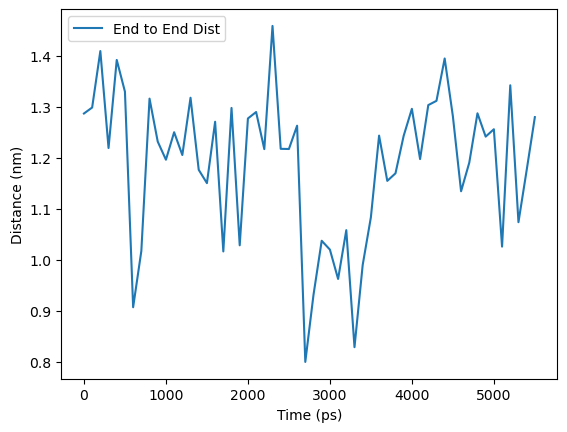

In [10]:
#plot distance vs time
plt.plot(traj.time, dist, label="End to End Dist")
# make this plot look nice
plt.legend(loc="upper left")
plt.xlabel('Time (ps)')
plt.ylabel('Distance (nm)')
plt.savefig("../Figures/End2End_distance.png", dpi = 300)
plt.show()

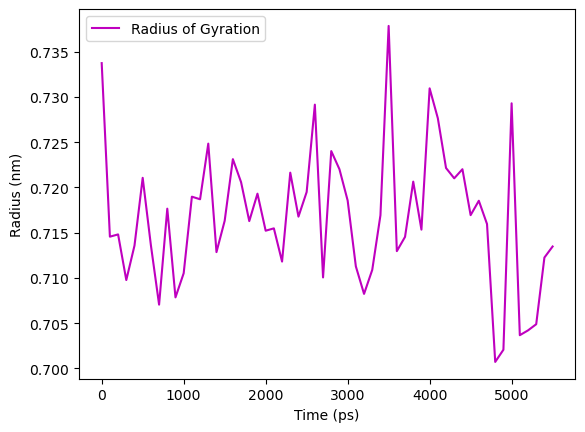

In [9]:
#plot gyration
plt.plot(traj.time, gyr, color = 'm', label="Radius of Gyration")
# make this plot look nice
plt.legend(loc="upper left")
plt.xlabel('Time (ps)')
plt.ylabel('Radius (nm)')
plt.savefig("../Figures/radius_gyration.png", dpi = 300)
plt.show()

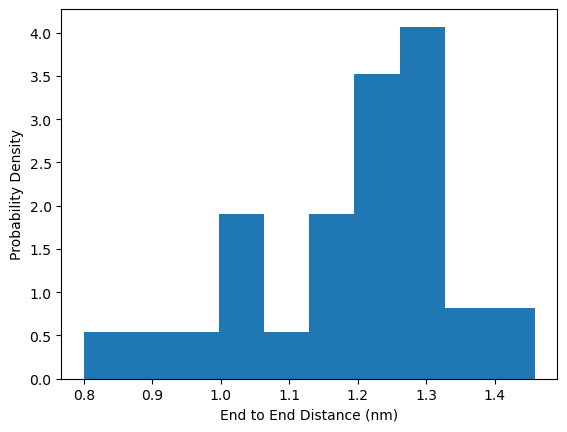

In [25]:
plt.hist(dist, density=True)
plt.xlabel('End to End Distance (nm)')
plt.ylabel("Probability Density")
plt.show()

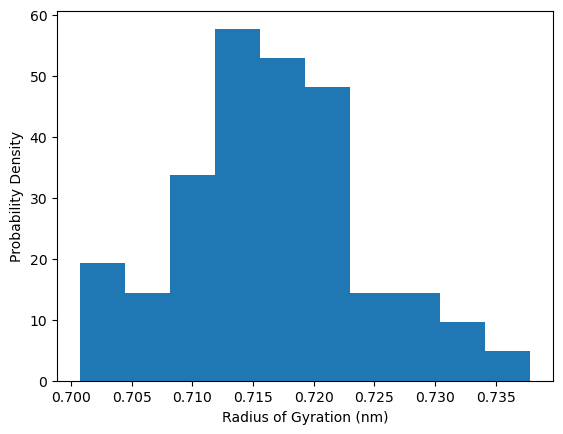

In [26]:
plt.hist(gyr, density=True)
plt.xlabel('Radius of Gyration (nm)')
plt.ylabel("Probability Density")
plt.show()